In [ ]:
# 9.3
import urllib
url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A6b847ab0-9a3d-4534-bf28-3a96c5fa8d72'
msg = urllib.request.urlretrieve(url, "Coastal_2020_08.tif")

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 3087, 'height': 2308, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(999.7994153462766, 0.0, -2550153.29233849,
       0.0, -999.9687691991521, 2711703.104608573), 'blockxsize': 3087, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


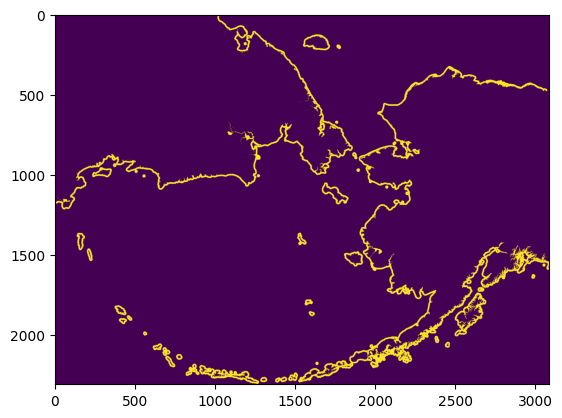

In [ ]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("Coastal_2020_08.tif") as ship_con:
    # read in raster (1st band)
    ships = ship_con.read(1) # Read 1st and only band
    ships_meta = ship_con.profile # Save metadata into ships_meta 

plt.imshow(ships)
print(ships_meta)

In [5]:
print(type(ships), type(ships_meta))

<class 'numpy.ndarray'> <class 'rasterio.profiles.Profile'>


In [8]:
import pprint
pprint.pprint(ships_meta)

{'blockxsize': 3087,
 'blockysize': 1,
 'compress': 'lzw',
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 2308,
 'interleave': 'band',
 'nodata': -3.3999999521443642e+38,
 'tiled': False,
 'transform': Affine(999.7994153462766, 0.0, -2550153.29233849,
       0.0, -999.9687691991521, 2711703.104608573),
 'width': 3087}


In [9]:
# 9.4
url = 'https://knb.ecoinformatics.org/knb/d1/mn/v2/object/urn%3Auuid%3A7c942c45-1539-4d47-b429-205499f0f3e4'
msg = urllib.request.urlretrieve(url, "Alaska_Commercial_Salmon_Boundaries.gpkg")

In [10]:
import geopandas as gpd
comm = gpd.read_file("Alaska_Commercial_Salmon_Boundaries.gpkg")

In [11]:
comm.columns.values

array(['OBJECTID', 'GEOMETRY_START_DATE', 'GEOMETRY_END_DATE',
       'STAT_AREA', 'STAT_AREA_NAME', 'FISHERY_GROUP_CODE',
       'GIS_SERIES_NAME', 'GIS_SERIES_CODE', 'REGION_CODE',
       'REGISTRATION_AREA_NAME', 'REGISTRATION_AREA_CODE',
       'REGISTRATION_AREA_ID', 'REGISTRATION_LOCATION_ABBR',
       'MANAGEMENT_AREA_NAME', 'MANAGEMENT_AREA_CODE', 'DISTRICT_NAME',
       'DISTRICT_CODE', 'DISTRICT_ID', 'SUBDISTRICT_NAME',
       'SUBDISTRICT_CODE', 'SUBDISTRICT_ID', 'SECTION_NAME',
       'SECTION_CODE', 'SECTION_ID', 'SUBSECTION_NAME', 'SUBSECTION_CODE',
       'SUBSECTION_ID', 'COAR_AREA_CODE', 'CREATOR', 'CREATE_DATE',
       'EDITOR', 'EDIT_DATE', 'COMMENTS', 'STAT_AREA_VERSION_ID',
       'Shape_Length', 'Shape_Area', 'geometry'], dtype=object)

In [13]:
comm.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,...,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,...,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [14]:
comm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
comm['geometry'][:5]

0    MULTIPOLYGON (((-151.32805 64.96913, -151.3150...
1    MULTIPOLYGON (((-149.96255 64.70518, -149.9666...
2    MULTIPOLYGON (((-161.39853 61.55463, -161.4171...
3    MULTIPOLYGON (((-153.15234 65.24944, -153.0761...
4    MULTIPOLYGON (((-152.99905 65.17027, -152.9897...
Name: geometry, dtype: geometry

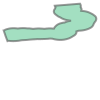

In [16]:
comm['geometry'][8]

<Axes: >

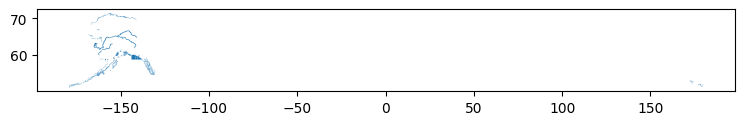

In [17]:
comm.plot(figsize=(9,9))

3338

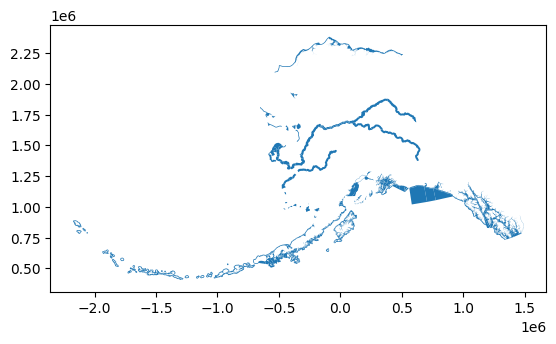

In [26]:
comm_3338 = comm.to_crs(ships_meta["crs"]) # or comm.to_crs("EPSG:3338")
comm_3338.plot()
ships_meta['crs'].to_epsg()

In [ ]:
# 9.5
# Create bounding box and read raster in cropped to that box
from shapely.geometry import box

coord_box = box(-159.5, 55, -144.5, 62)

coord_box_df = gpd.GeoDataFrame(
    crs = 'EPSG:4326',
    geometry = [coord_box]).to_crs(ships_meta["crs"])

In [ ]:
import rasterio.mask # Only grabs a subset of a raster file
import numpy as np

with rasterio.open("Coastal_2020_08.tif") as ship_con:
    shipc_arr, shipc_transform = rasterio.mask.mask(ship_con, # c for 'cropped'
                                                    coord_box_df["geometry"],
                                                    crop=True)
    shipc_meta = ship_con.meta # Save metadata gain -- different from full raster
    # select just the 2-D array (by default a 3-D array is returned even though we only have one band)
    shipc_arr = shipc_arr[0,:,:]
    # turn the no-data values into NaNs.
    shipc_arr[shipc_arr == ship_con.nodata] = np.nan

# Update metadata
shipc_meta.update({"driver": "GTiff",
                 "height": shipc_arr.shape[0],
                 "width": shipc_arr.shape[1],
                 "transform": shipc_transform,
                 "compression": "lzw",
                 "nodata": np.nan})

# Geopandas spatial join to select rows in vector dataframe within bounding box
comm_clip = gpd.sjoin(comm_3338, # df
                      coord_box_df, # bbox
                      how='inner',
                      predicate='within') # Save stuff in box

<Axes: >

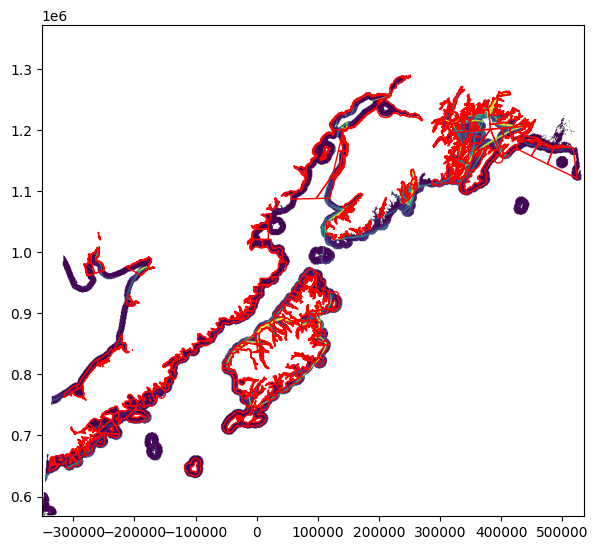

In [25]:
import rasterio.plot

# set up plot
fig, ax = plt.subplots(figsize=(7, 7))
# plot the raster
rasterio.plot.show(shipc_arr,
                   ax=ax,
                   vmin = 0,
                   vmax = 50000,
                   transform = shipc_transform)
# plot the vector
comm_clip.plot(ax=ax, facecolor='none', edgecolor='red')

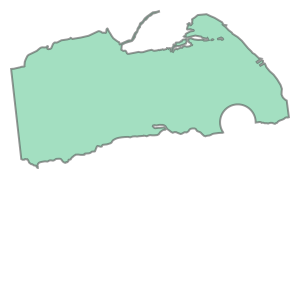

In [30]:
comm_clip["geometry"][40]

In [ ]:
# 9.6
# Calculating total distances per fishing area
# One ploygon

from rasterio import features
r40 = features.rasterize(comm_clip["geometry"][40].geoms,
                        out_shape=shipc_arr.shape,
                        transform=shipc_meta['transform'],
                        all_touched=True)

<Axes: >

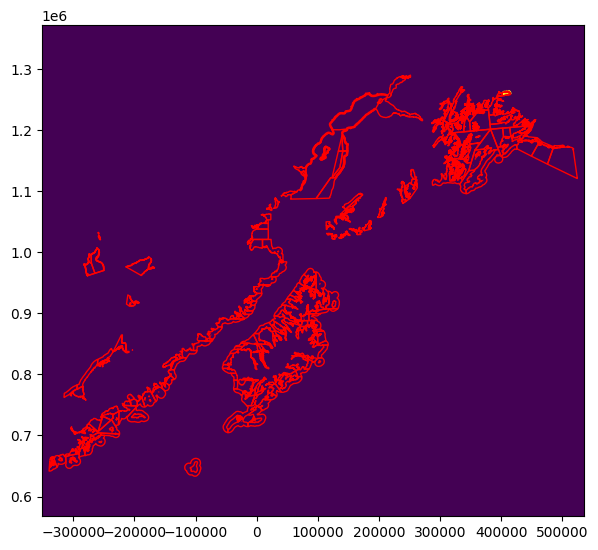

In [34]:
fig, ax = plt.subplots(figsize=(7,7))

rasterio.plot.show(r40,
                   ax=ax,
                   vmin = 0,
                   vmax = 1,
                   transform = shipc_meta['transform'])

# plot the vector
comm_clip.plot(ax=ax, facecolor='none', edgecolor='red')

In [37]:
np.unique(r40) # Only contains 0s and 1s, (i.e., in or out of the box)

array([0, 1])

In [38]:
r40_index = np.where(r40 == 1)
print(r40_index)

(array([108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109,
       109, 109, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110,
       110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111,
       111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 112, 112, 112,
       112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 113,
       113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114, 114,
       114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 116]), array([759, 760, 762, 763, 764, 755, 756, 757, 758, 759, 761, 762, 763,
       764, 765, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763,
       764, 765, 766, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762,
       763, 764, 765, 766, 753, 754, 755, 756, 757, 758, 759, 760, 761,
       762, 763, 764, 765, 766, 767, 753, 754, 755, 756, 757, 758, 759,
       760, 761, 762, 763, 764, 765, 766, 767, 753, 754, 755, 756, 757,
       758, 759, 760, 761, 762, 763, 753, 754, 755, 756, 757,

In [ ]:
np.nansum(shipc_arr[r40_index]) # Total meters travelled over fishing district 40


np.float32(14369028.0)

In [ ]:
# Run over ALL polygons
comm_clip['id'] = range(0,len(comm_clip))
comm_clip.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,...,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry,index_right,id
39,94,2012-01-01 00:00:00+00:00,NaT,22330,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,None,None,2.188227,0.030013,"MULTIPOLYGON (((318413.684 1230482.468, 318575...",0,0
40,95,2004-01-01 00:00:00+00:00,NaT,22168,Solomon Gulch THA,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,None,None,0.881387,0.010914,"MULTIPOLYGON (((401885.622 1255960.584, 401365...",0,1
41,96,2004-01-01 00:00:00+00:00,NaT,22160,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,None,None,0.676153,0.007094,"MULTIPOLYGON (((396590.668 1262277.816, 396645...",0,2
42,97,1961-01-01 00:00:00+00:00,NaT,22150,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,None,None,3.556800,0.048109,"MULTIPOLYGON (((388721.609 1225081.809, 380273...",0,3
43,98,2012-01-01 00:00:00+00:00,NaT,22312,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,None,None,0.858479,0.023543,"MULTIPOLYGON (((315804.131 1210691.072, 315456...",0,4


In [ ]:
# Dict to save for loop values
distance_dict = {}

# Loop over each row of dataframe

# Ideal place to parallelize, independent rows we can work on seperately
for geom, idx in zip(comm_clip['geometry'],comm_clip['id']): # Or just use enumerate
    rasterized = features.rasterize(geom.geoms,
                                    out_shape=shipc_arr.shape,
                                    transform=shipc_meta['transform'],
                                    all_touched=True)
    r_index = np.where(rasterized == 1)
    total_distances = np.nansum(shipc_arr[r_index])
    distance_dict[idx] = total_distances

In [44]:
import pandas as pd
distance_df = pd.DataFrame.from_dict(distance_dict,
                                    orient="index",
                                    columns=['distance'])
distance_df["id"] = distance_df.index
distance_df['distance'] = distance_df['distance'] / 1000 # To km
distance_df

,distance,id
0,2171.926514,0
1,14369.028320,1
2,8813.870117,2
3,26205.326172,3
4,4642.519043,4
...,...,...
327,903.972595,327
328,2383.380615,328
329,41.582813,329
330,0.000000,330


In [45]:
# Merge with geopandas dataframe

res_full = comm_clip.merge(distance_df,
                        on='id',
                        how='inner')

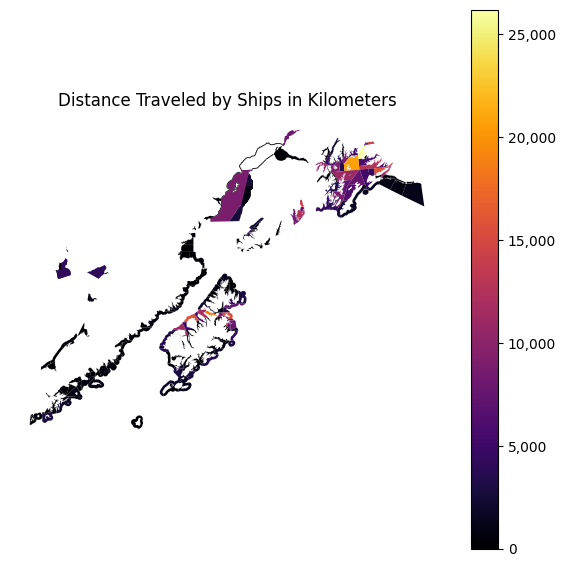

In [50]:
# Plot results with mpl
import matplotlib.ticker
fig, ax = plt.subplots(figsize=(7, 7))

ax = res_full.plot(column = "distance", legend = True, ax = ax,cmap='inferno')
fig = ax.figure
label_format = '{:,.0f}'
cb_ax = fig.axes[1]
ticks_loc = cb_ax.get_yticks().tolist()
cb_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
cb_ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
ax.set_axis_off()
ax.set_title("Distance Traveled by Ships in Kilometers")
plt.show()

In [ ]:
reg_area = res_full.dissolve("REGISTRATION_AREA_NAME",
                    aggfunc="sum",
                    numeric_only = True)

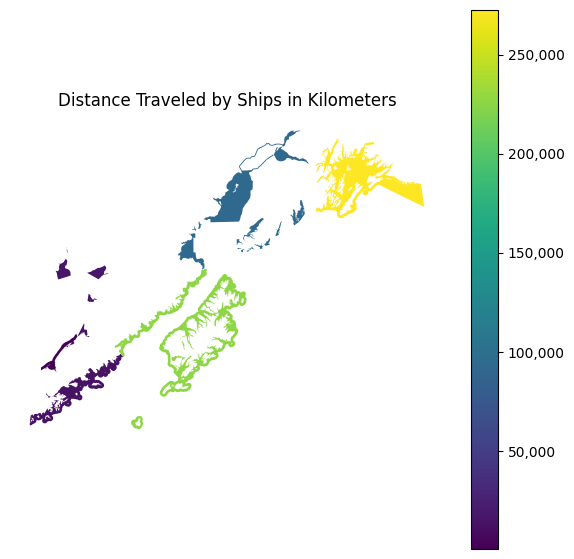

In [53]:
fig, ax = plt.subplots(figsize=(7, 7))

ax = reg_area.plot(column = "distance", legend = True, ax = ax)
fig = ax.figure
label_format = '{:,.0f}'
cb_ax = fig.axes[1]
ticks_loc = cb_ax.get_yticks().tolist()
cb_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
cb_ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
ax.set_axis_off()
ax.set_title("Distance Traveled by Ships in Kilometers")
plt.show()